<a href="https://colab.research.google.com/github/codingercat/Machine_Learning_Projects/blob/main/Monkey_Species_Keras_Shambhavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

root = '../content'

train_dir = Path(f'{root}/drive/MyDrive/Monkey-Species-Keras-Dataset/training/training/')
test_dir = Path(f'{root}/drive/MyDrive/Monkey-Species-Keras-Dataset/validation/validation/')

In [5]:
#label info
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
label_df = pd.read_csv(f"{root}/drive/MyDrive/Monkey-Species-Keras-Dataset/monkey_labels.txt", names=cols, skiprows=1)
label_df

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [6]:
labels = label_df['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [7]:
def image_show(num_image,label):
    from matplotlib import pyplot as plt
    import random
    import cv2
    import os
    for i in range(num_image):
        imgdir = Path(f'{root}/drive/MyDrive/Monkey-Species-Keras-Dataset/training/training/' + label)
        imgfile = random.choice(os.listdir(imgdir))
        img = cv2.imread(f'{root}/drive/MyDrive/Monkey-Species-Keras-Dataset/training/training/'+ label +'/'+ imgfile)
        plt.figure(i)
        plt.imshow(img)
        plt.title(imgfile)
    plt.show()

 pygmy_marmoset                


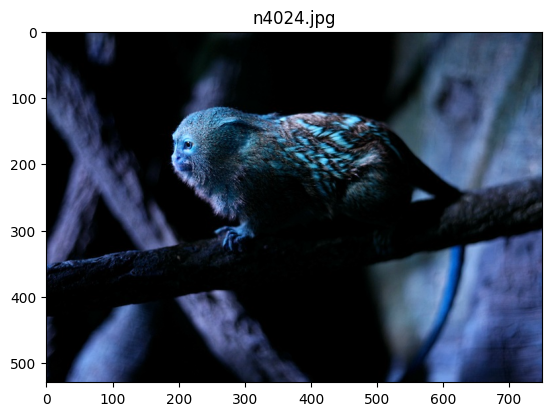

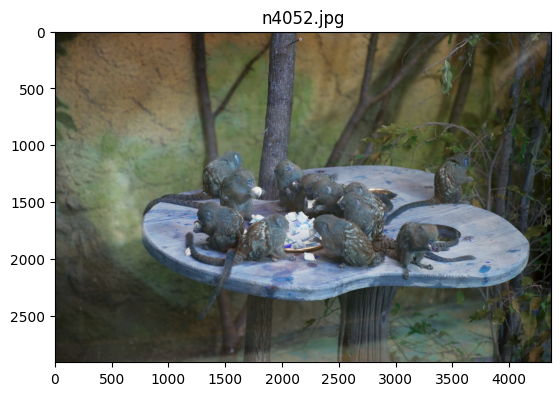

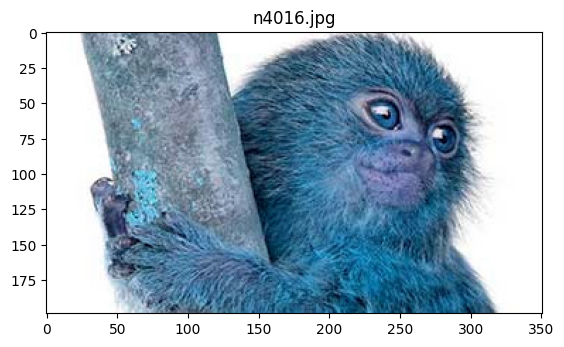

In [8]:
print(labels[4])
image_show(3,'n4')

In [9]:
from keras.preprocessing.image import ImageDataGenerator

height = 150
width = 150
batch_size = 64
seed = 100

# Training generator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    batch_size=batch_size,
    seed=seed,
    shuffle=True,
    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(height, width),
    batch_size=batch_size,
    seed=seed,
    shuffle=False,
    class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [10]:
def get_net(num_classes):
    from keras.models import Sequential
    from keras.layers import Conv2D, Activation, BatchNormalization, GlobalAvgPool2D, MaxPooling2D, Dropout

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), strides=2))
    model.add(Activation('relu'))

    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), strides=2))
    model.add(Activation('relu'))

    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), strides=2))
    model.add(Activation('relu'))

    model.add(Conv2D(512, (1, 1), strides=2))
    model.add(Activation('relu'))
    model.add(Conv2D(num_classes, (1, 1)))
    model.add(GlobalAvgPool2D())
    model.add(Activation('softmax'))
    return model

num_classes = 10
net = get_net(num_classes)
net.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 32)        896       
                                                                 
 activation (Activation)     (None, 74, 74, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 36, 36, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 36, 36, 32)       128       
 hNormalization)                                        

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath=("monkey.h5f")
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list = [checkpoint]#, stopper]

epochs = 100

history = net.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list,
                              verbose = 1
                             )

<ipython-input-11-86aa288cbe9d>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = net.fit_generator(train_generator,


Epoch 1/100
17/17 [==============================] - ETA: 0s - loss: 2.0764 - acc: 0.2292 
Epoch 1: val_acc improved from -inf to 0.14062, saving model to monkey.h5f


17/17 [==============================] - 194s 11s/step - loss: 2.0764 - acc: 0.2292 - val_loss: 2.2853 - val_acc: 0.1406
Epoch 2/100
17/17 [==============================] - ETA: 0s - loss: 1.7365 - acc: 0.3772
Epoch 2: val_acc did not improve from 0.14062
17/17 [==============================] - 57s 3s/step - loss: 1.7365 - acc: 0.3772 - val_loss: 2.3087 - val_acc: 0.1250
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 1.6430 - acc: 0.4236
Epoch 3: val_acc did not improve from 0.14062
17/17 [==============================] - 56s 3s/step - loss: 1.6430 - acc: 0.4236 - val_loss: 2.3277 - val_acc: 0.0742
Epoch 4/100
17/17 [==============================] - ETA: 0s - loss: 1.5826 - acc: 0.4226
Epoch 4: val_acc did not improve from 0.14062
17/17 [==============================] - 59s 3s/step - loss: 1.5826 - acc: 0.4226 - val_loss: 2.4462 - val_acc: 0.0977
Epoch 5/100
17/17 [==============================] - ETA: 0s - loss: 1.5374 - acc: 0.4449
Epoch 5: val_acc did not

17/17 [==============================] - 55s 3s/step - loss: 1.2241 - acc: 0.5783 - val_loss: 4.7255 - val_acc: 0.1680
Epoch 20/100
17/17 [==============================] - ETA: 0s - loss: 1.2323 - acc: 0.5851
Epoch 20: val_acc did not improve from 0.16797
17/17 [==============================] - 54s 3s/step - loss: 1.2323 - acc: 0.5851 - val_loss: 5.3087 - val_acc: 0.0938
Epoch 21/100
17/17 [==============================] - ETA: 0s - loss: 1.2060 - acc: 0.5928
Epoch 21: val_acc improved from 0.16797 to 0.17188, saving model to monkey.h5f


17/17 [==============================] - 55s 3s/step - loss: 1.2060 - acc: 0.5928 - val_loss: 3.9903 - val_acc: 0.1719
Epoch 22/100
17/17 [==============================] - ETA: 0s - loss: 1.2250 - acc: 0.5919
Epoch 22: val_acc did not improve from 0.17188
17/17 [==============================] - 52s 3s/step - loss: 1.2250 - acc: 0.5919 - val_loss: 3.6470 - val_acc: 0.1641
Epoch 23/100
17/17 [==============================] - ETA: 0s - loss: 1.1965 - acc: 0.5841
Epoch 23: val_acc did not improve from 0.17188
17/17 [==============================] - 52s 3s/step - loss: 1.1965 - acc: 0.5841 - val_loss: 3.4453 - val_acc: 0.1602
Epoch 24/100
17/17 [==============================] - ETA: 0s - loss: 1.1662 - acc: 0.5873
Epoch 24: val_acc did not improve from 0.17188
17/17 [==============================] - 55s 3s/step - loss: 1.1662 - acc: 0.5873 - val_loss: 4.4109 - val_acc: 0.0938
Epoch 25/100
17/17 [==============================] - ETA: 0s - loss: 1.1198 - acc: 0.6025
Epoch 25: val_acc d

17/17 [==============================] - 55s 3s/step - loss: 1.1265 - acc: 0.6074 - val_loss: 2.6613 - val_acc: 0.2305
Epoch 27/100
17/17 [==============================] - ETA: 0s - loss: 1.1110 - acc: 0.6141
Epoch 27: val_acc did not improve from 0.23047
17/17 [==============================] - 56s 3s/step - loss: 1.1110 - acc: 0.6141 - val_loss: 3.3952 - val_acc: 0.1172
Epoch 28/100
17/17 [==============================] - ETA: 0s - loss: 1.1593 - acc: 0.5919
Epoch 28: val_acc improved from 0.23047 to 0.23828, saving model to monkey.h5f


17/17 [==============================] - 55s 3s/step - loss: 1.1593 - acc: 0.5919 - val_loss: 2.5131 - val_acc: 0.2383
Epoch 29/100
17/17 [==============================] - ETA: 0s - loss: 1.1337 - acc: 0.6044
Epoch 29: val_acc did not improve from 0.23828
17/17 [==============================] - 54s 3s/step - loss: 1.1337 - acc: 0.6044 - val_loss: 2.8909 - val_acc: 0.2031
Epoch 30/100
17/17 [==============================] - ETA: 0s - loss: 1.0755 - acc: 0.6199
Epoch 30: val_acc improved from 0.23828 to 0.31641, saving model to monkey.h5f


17/17 [==============================] - 55s 3s/step - loss: 1.0755 - acc: 0.6199 - val_loss: 2.1082 - val_acc: 0.3164
Epoch 31/100
17/17 [==============================] - ETA: 0s - loss: 1.0718 - acc: 0.6296
Epoch 31: val_acc improved from 0.31641 to 0.32422, saving model to monkey.h5f


17/17 [==============================] - 55s 3s/step - loss: 1.0718 - acc: 0.6296 - val_loss: 1.9415 - val_acc: 0.3242
Epoch 32/100
17/17 [==============================] - ETA: 0s - loss: 1.0710 - acc: 0.6364
Epoch 32: val_acc improved from 0.32422 to 0.33984, saving model to monkey.h5f


17/17 [==============================] - 56s 3s/step - loss: 1.0710 - acc: 0.6364 - val_loss: 2.0494 - val_acc: 0.3398
Epoch 33/100
17/17 [==============================] - ETA: 0s - loss: 1.0984 - acc: 0.6267
Epoch 33: val_acc improved from 0.33984 to 0.35156, saving model to monkey.h5f


17/17 [==============================] - 57s 3s/step - loss: 1.0984 - acc: 0.6267 - val_loss: 2.0007 - val_acc: 0.3516
Epoch 34/100
17/17 [==============================] - ETA: 0s - loss: 1.0885 - acc: 0.6296
Epoch 34: val_acc improved from 0.35156 to 0.36328, saving model to monkey.h5f


17/17 [==============================] - 55s 3s/step - loss: 1.0885 - acc: 0.6296 - val_loss: 1.8056 - val_acc: 0.3633
Epoch 35/100
17/17 [==============================] - ETA: 0s - loss: 1.0551 - acc: 0.6460
Epoch 35: val_acc improved from 0.36328 to 0.43359, saving model to monkey.h5f


17/17 [==============================] - 67s 4s/step - loss: 1.0551 - acc: 0.6460 - val_loss: 1.5580 - val_acc: 0.4336
Epoch 36/100
17/17 [==============================] - ETA: 0s - loss: 1.0376 - acc: 0.6460
Epoch 36: val_acc did not improve from 0.43359
17/17 [==============================] - 56s 3s/step - loss: 1.0376 - acc: 0.6460 - val_loss: 2.6521 - val_acc: 0.2656
Epoch 37/100
17/17 [==============================] - ETA: 0s - loss: 1.0066 - acc: 0.6441
Epoch 37: val_acc did not improve from 0.43359
17/17 [==============================] - 56s 3s/step - loss: 1.0066 - acc: 0.6441 - val_loss: 1.6455 - val_acc: 0.4062
Epoch 38/100
17/17 [==============================] - ETA: 0s - loss: 0.9653 - acc: 0.6818
Epoch 38: val_acc did not improve from 0.43359
17/17 [==============================] - 55s 3s/step - loss: 0.9653 - acc: 0.6818 - val_loss: 2.8093 - val_acc: 0.3203
Epoch 39/100
17/17 [==============================] - ETA: 0s - loss: 1.0379 - acc: 0.6422
Epoch 39: val_acc i

17/17 [==============================] - 57s 3s/step - loss: 1.0379 - acc: 0.6422 - val_loss: 1.5034 - val_acc: 0.5156
Epoch 40/100
17/17 [==============================] - ETA: 0s - loss: 0.9909 - acc: 0.6509
Epoch 40: val_acc improved from 0.51562 to 0.57812, saving model to monkey.h5f


17/17 [==============================] - 71s 4s/step - loss: 0.9909 - acc: 0.6509 - val_loss: 1.2512 - val_acc: 0.5781
Epoch 41/100
17/17 [==============================] - ETA: 0s - loss: 0.9177 - acc: 0.6838
Epoch 41: val_acc improved from 0.57812 to 0.66406, saving model to monkey.h5f


17/17 [==============================] - 59s 3s/step - loss: 0.9177 - acc: 0.6838 - val_loss: 0.9282 - val_acc: 0.6641
Epoch 42/100
17/17 [==============================] - ETA: 0s - loss: 0.9021 - acc: 0.6973
Epoch 42: val_acc did not improve from 0.66406
17/17 [==============================] - 56s 3s/step - loss: 0.9021 - acc: 0.6973 - val_loss: 1.1404 - val_acc: 0.6289
Epoch 43/100
17/17 [==============================] - ETA: 0s - loss: 0.9055 - acc: 0.6912
Epoch 43: val_acc did not improve from 0.66406
17/17 [==============================] - 59s 3s/step - loss: 0.9055 - acc: 0.6912 - val_loss: 1.0736 - val_acc: 0.6250
Epoch 44/100
17/17 [==============================] - ETA: 0s - loss: 0.9217 - acc: 0.6925
Epoch 44: val_acc did not improve from 0.66406
17/17 [==============================] - 57s 3s/step - loss: 0.9217 - acc: 0.6925 - val_loss: 1.1663 - val_acc: 0.6211
Epoch 45/100
17/17 [==============================] - ETA: 0s - loss: 0.8792 - acc: 0.7031
Epoch 45: val_acc d

17/17 [==============================] - 60s 4s/step - loss: 0.8285 - acc: 0.7060 - val_loss: 0.8569 - val_acc: 0.7109
Epoch 50/100
17/17 [==============================] - ETA: 0s - loss: 0.8118 - acc: 0.7166
Epoch 50: val_acc did not improve from 0.71094
17/17 [==============================] - 57s 3s/step - loss: 0.8118 - acc: 0.7166 - val_loss: 1.3585 - val_acc: 0.5312
Epoch 51/100
17/17 [==============================] - ETA: 0s - loss: 0.8516 - acc: 0.7176
Epoch 51: val_acc did not improve from 0.71094
17/17 [==============================] - 57s 3s/step - loss: 0.8516 - acc: 0.7176 - val_loss: 1.1564 - val_acc: 0.5703
Epoch 52/100
17/17 [==============================] - ETA: 0s - loss: 0.8934 - acc: 0.6992
Epoch 52: val_acc did not improve from 0.71094
17/17 [==============================] - 55s 3s/step - loss: 0.8934 - acc: 0.6992 - val_loss: 2.3600 - val_acc: 0.3555
Epoch 53/100
17/17 [==============================] - ETA: 0s - loss: 0.8328 - acc: 0.7137
Epoch 53: val_acc d

17/17 [==============================] - 61s 4s/step - loss: 0.8025 - acc: 0.7273 - val_loss: 0.8606 - val_acc: 0.7227
Epoch 57/100
17/17 [==============================] - ETA: 0s - loss: 0.7485 - acc: 0.7456
Epoch 57: val_acc did not improve from 0.72266
17/17 [==============================] - 53s 3s/step - loss: 0.7485 - acc: 0.7456 - val_loss: 1.0197 - val_acc: 0.6328
Epoch 58/100
17/17 [==============================] - ETA: 0s - loss: 0.7398 - acc: 0.7689
Epoch 58: val_acc did not improve from 0.72266
17/17 [==============================] - 55s 3s/step - loss: 0.7398 - acc: 0.7689 - val_loss: 1.2446 - val_acc: 0.6016
Epoch 59/100
17/17 [==============================] - ETA: 0s - loss: 0.7471 - acc: 0.7447
Epoch 59: val_acc did not improve from 0.72266
17/17 [==============================] - 55s 3s/step - loss: 0.7471 - acc: 0.7447 - val_loss: 1.2027 - val_acc: 0.6445
Epoch 60/100
17/17 [==============================] - ETA: 0s - loss: 0.7420 - acc: 0.7544
Epoch 60: val_acc d